In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ordinary differential equations

![](http://www.learnpedia.in/blog/wp-content/uploads/2015/07/learnpedia.in-differential-equations-21.jpg)

## Euler method

In [2]:
def euler(f, x, y0):
    h = x[1] - x[0]
    y = np.empty_like(x)
    y[0] = y0
    for i in range(1, len(x)):
        y[i] = y[i - 1] + h * f(x[i - 1], y[i - 1])
    return y

To check correctness we are going to solve simple differential equation
$$y' = (x + y)^2,\\
y(0) = 0,\\
[a, b] = [0, 0.5],\\
h = 0.05
$$

Solution here is a function $y(x) = tan(x) - x$.

In [3]:
dy = lambda x, y: x*x + y*y
x = np.linspace(0, 0.5, 100)
y0 = 0

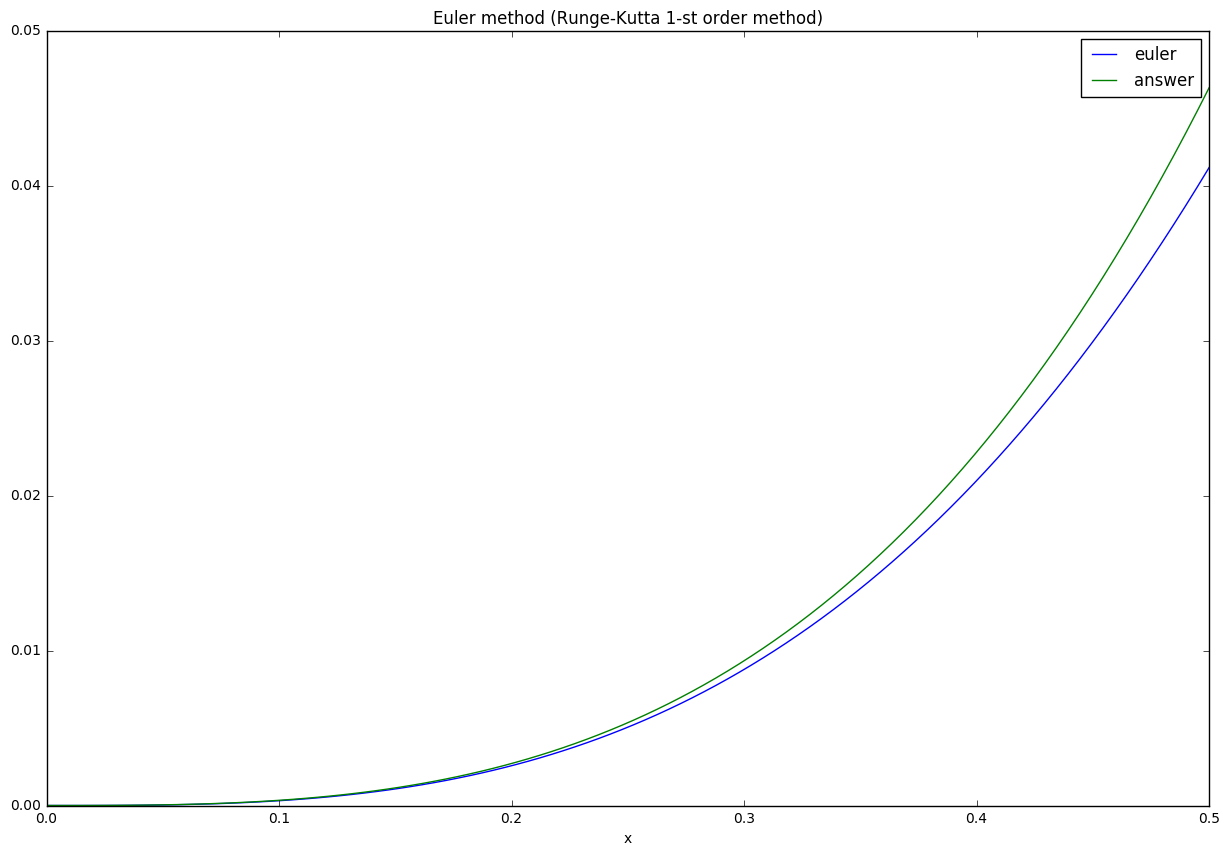

In [4]:
y = euler(dy, x, y0)
y_ans = np.tan(x) - x

plt.figure(figsize=(15, 10))
plt.plot(x, y, x, y_ans)
plt.legend(['euler', 'answer'], loc='best')
plt.xlabel('x')
plt.title('Euler method (Runge-Kutta 1-st order method)')
plt.show()

The next method we are going to use is Runge-Kutta method family. Actually Euler method is a **special case** of Runge-Kutta methods.

## Runge-Kutta methods family

We actually are going to try only two from Runge-Kutta methods: RK3 and RK4.

In [5]:
def runge_kutta3(f, x, y0):
    h = x[1] - x[0]
    y = np.empty_like(x)
    y[0] = y0
    for i in range(1, len(x)):
        k1 = h * f(x[i - 1], y[i - 1])
        k2 = h * f(x[i - 1] + h/3, y[i - 1] + k1/3)
        k3 = h * f(x[i - 1] + 2*h/3, y[i - 1] + 2*k2/3)
        y[i] = y[i - 1] + (k1 + 3*k3) / 4
    return y

In [6]:
def runge_kutta4(f, x, y0):
    h = x[1] - x[0]
    y = np.empty_like(x)
    y[0] = y0
    for i in range(1, len(x)):
        k1 = h * f(x[i - 1], y[i - 1])
        k2 = h * f(x[i - 1] + h/2, y[i - 1] + k1/2)
        k3 = h * f(x[i - 1] + h/2, y[i - 1] + k2/2)
        k4 = h * f(x[i - 1] + h, y[i - 1] + k3)
        y[i] = y[i - 1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

Let's solve slightly different equation
$$
y' = \frac{sin(x)}{y},\\
y(0) = 1,\\
[a, b] = [0, 5],\\
h = 1.25
$$

A correct solution is $y = \sqrt{3 - 2cos(x)}$

In [7]:
dy = lambda x, y: np.sin(x) / y
x = np.linspace(0, 5, 4)
y0 = 1

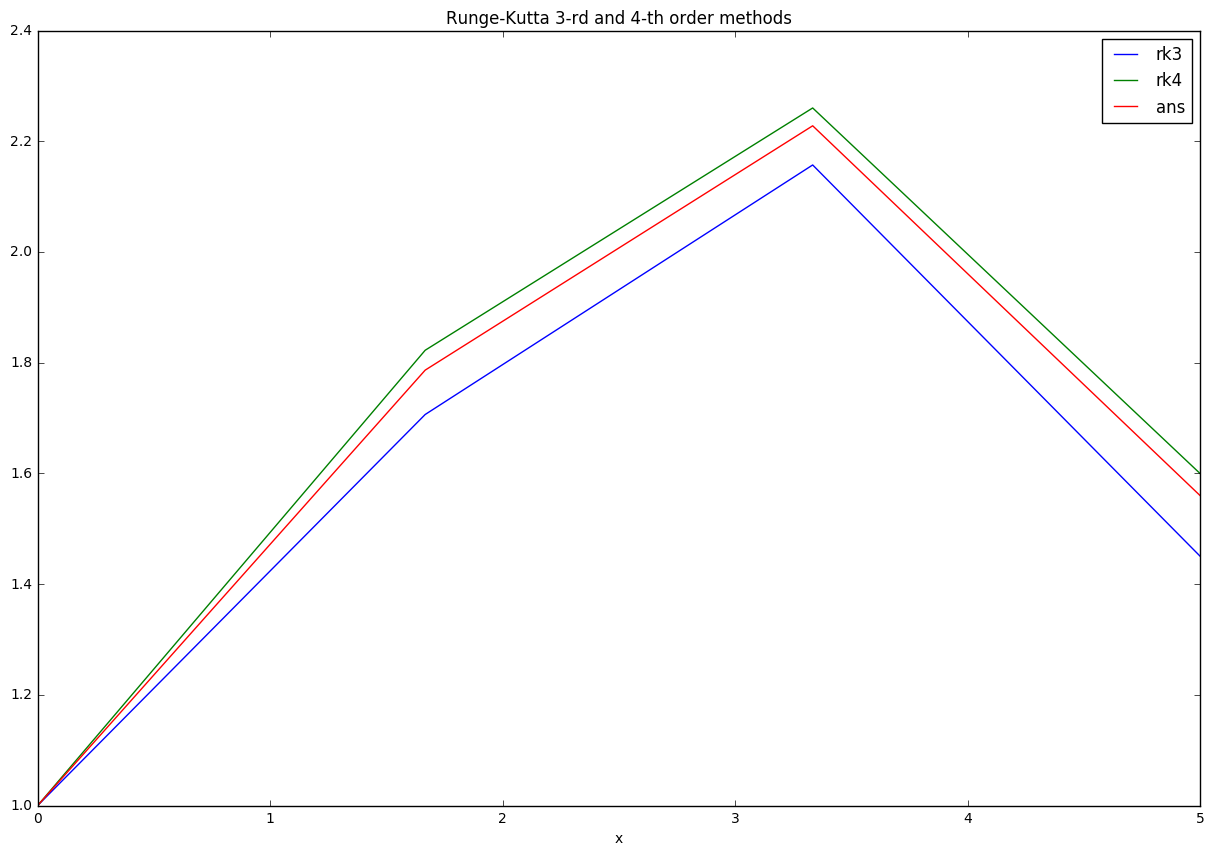

In [8]:
y3 = runge_kutta3(dy, x, y0)
y4 = runge_kutta4(dy, x, y0)
y_ans = np.sqrt(3 - 2*np.cos(x))

plt.figure(figsize=(15, 10))
plt.plot(x, y3, x, y4, x, y_ans)
plt.legend(['rk3', 'rk4', 'ans'], loc='best')
plt.xlabel('x')
plt.title('Runge-Kutta 3-rd and 4-th order methods')
plt.show()

Now let's move to system of differential equations.

## Runge-Kutta methods for SDE

In [9]:
def fmap(fs, x):
    return np.array([f(*x) for f in fs])

In [1]:
def runge_kutta4_system(fs, x, y0):
    h = x[1] - x[0]
    y = np.empty((len(x), len(y0)))
    y[0] = y0
    for i in range(1, len(x)):
        k1 = h * fmap(fs, [x[i - 1], *y[i - 1]])
        k2 = h * fmap(fs, [x[i - 1] + h/2, *(y[i - 1] + k1/2)])
        k3 = h * fmap(fs, [x[i - 1] + h/2, *(y[i - 1] + k2/2)])
        k4 = h * fmap(fs, [x[i - 1] + h, *(y[i - 1] + k3)])
        y[i] = y[i - 1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

Eg. We have system of differential equations
$$
y = z',\\
z' = \frac{2xz}{x^2+1},\\
y(0) = 1,\\
z(0) = 3
$$

Let's try to solve it using Runge-Kutta methods of order 4.

In [11]:
dy = lambda x, y, z: z
dz = lambda x, y, z: 2*x*z / (x*x + 1)
fs = [dy, dz]
x = np.linspace(0, 1, 10)
y0 = np.array([1, 3])

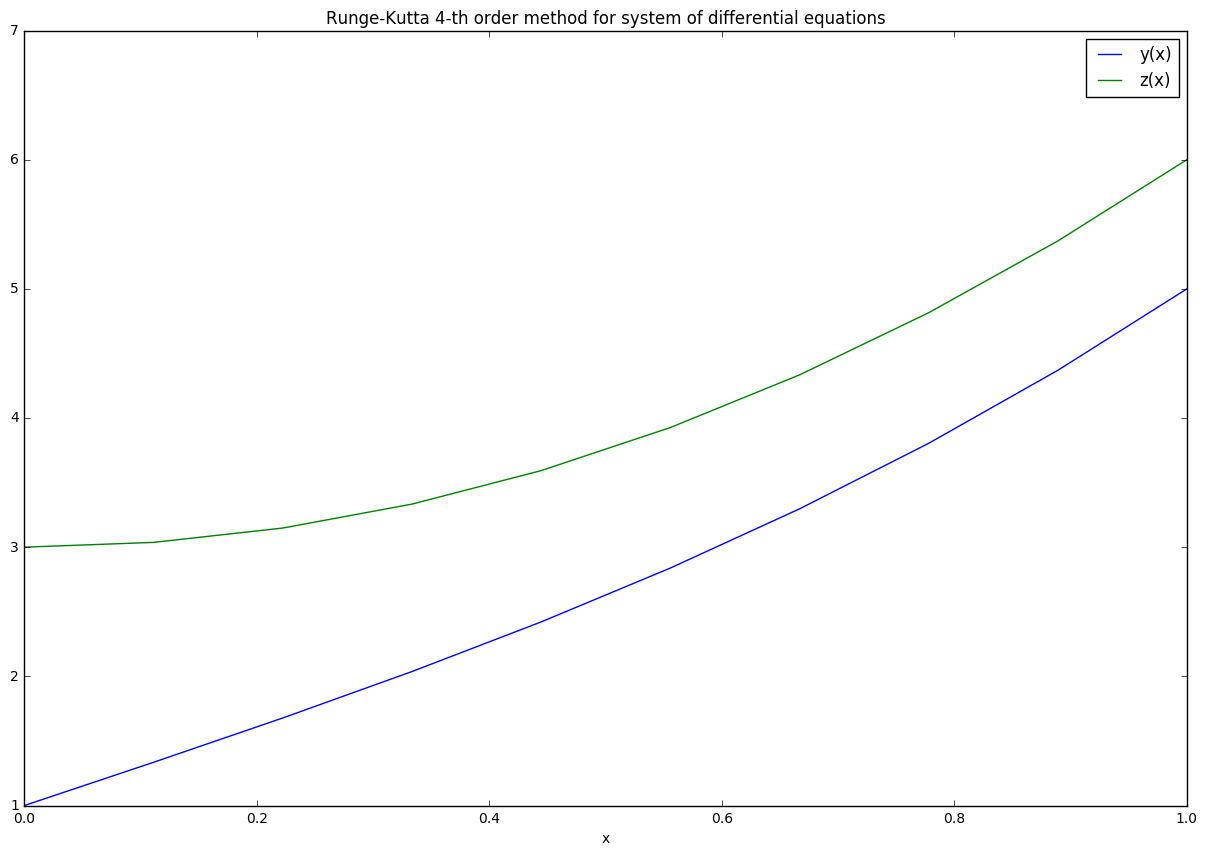

In [12]:
y = runge_kutta4_system(fs, x, y0)

plt.figure(figsize=(15, 10))
plt.plot(x, y[:, 0], x, y[:, 1])
plt.legend(['y(x)', 'z(x)'], loc='best')
plt.xlabel('x')
plt.title('Runge-Kutta 4-th order method for system of differential equations')
plt.show()

## Predator-prey equation

$$
\frac{dx}{dt} = \alpha x - \beta xy\\
\frac{dy}{dt} = \delta xy - \gamma y
$$
where $x$ - population of preys, and $y$ - population predators

In [13]:
dx = lambda t, x, y: 2/3*x - 4/3*x*y
dy = lambda t, x, y: x*y - y
fs = [dx, dy]
t = np.linspace(0, 20, 500)
y0 = np.array([1, 2])

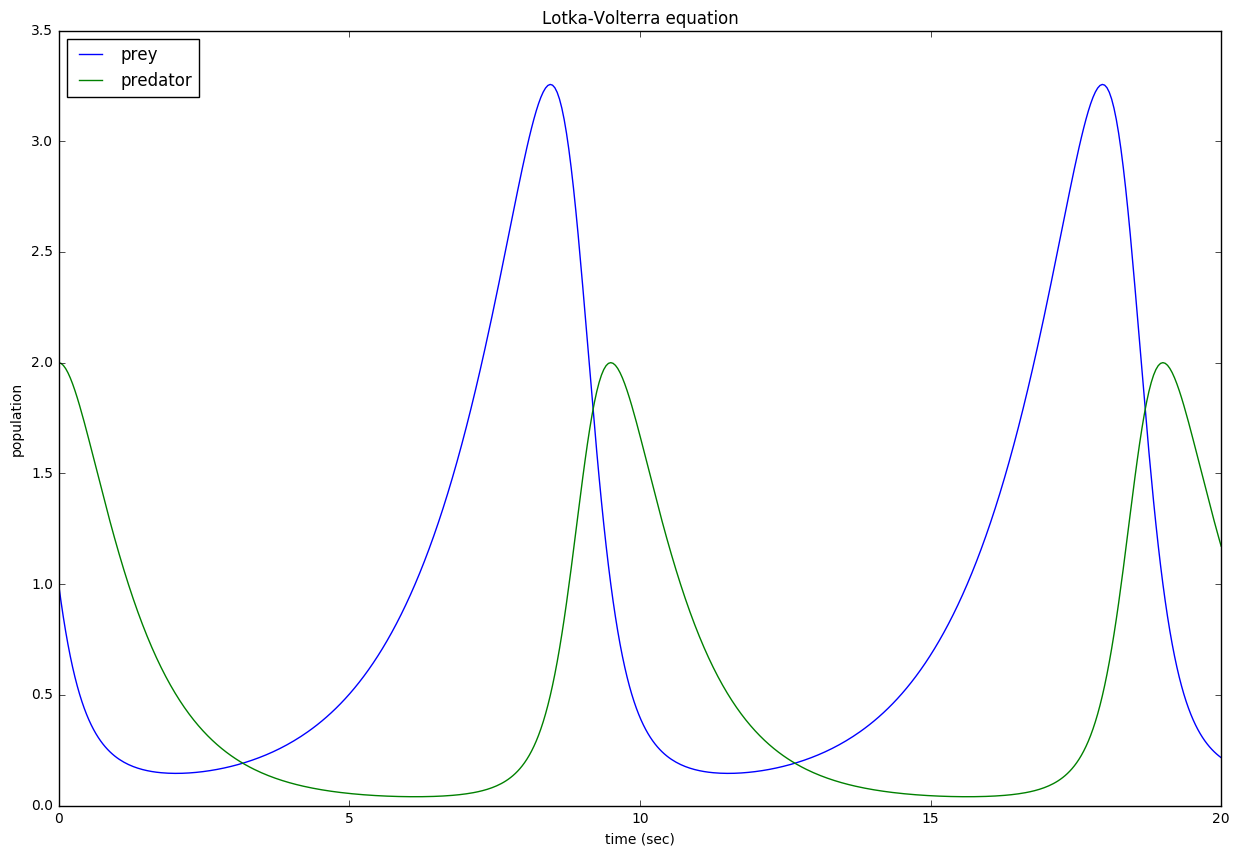

In [14]:
z = runge_kutta4_system(fs, t, y0)

plt.figure(figsize=(15, 10))
plt.plot(t, z[:, 0], t, z[:, 1])
plt.legend(['prey', 'predator'], loc='best')
plt.xlabel('time (sec)')
plt.ylabel('population')
plt.title('Lotka-Volterra equation')
plt.show()

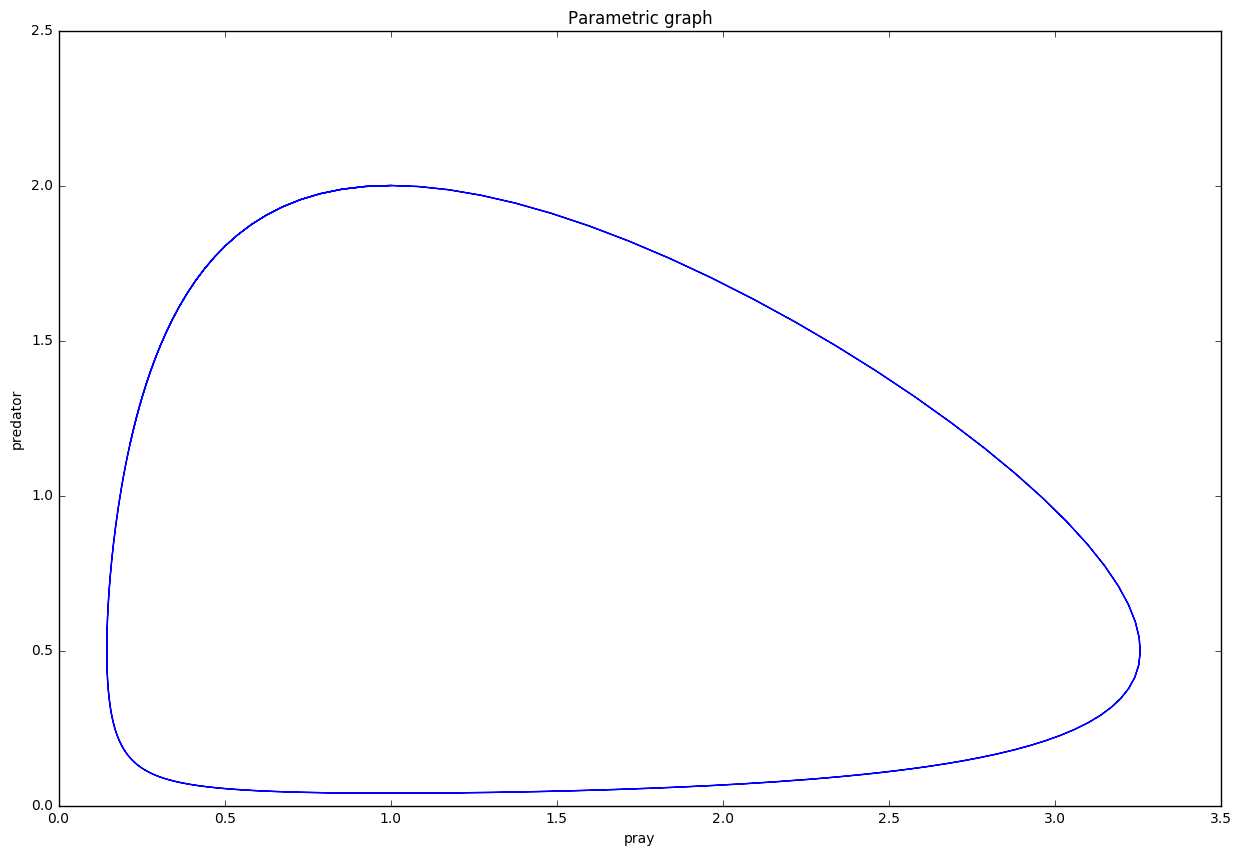

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(z[:, 0], z[:, 1])
plt.xlabel('pray')
plt.ylabel('predator')
plt.title('Parametric graph')
plt.show()

## Equilibrium

Let's look at population equilibrium
$$
y = \frac{\alpha}{\beta}\\
x = \frac{\gamma}{\delta}
$$
we will take values close to these to show how it's approaching equilibrium

In [16]:
dx = lambda t, x, y: 2/3*x - 4/3*x*y
dy = lambda t, x, y: x*y - y
fs = [dx, dy]
t = np.linspace(0, 20, 500)
y0 = np.array([1, 101/200])

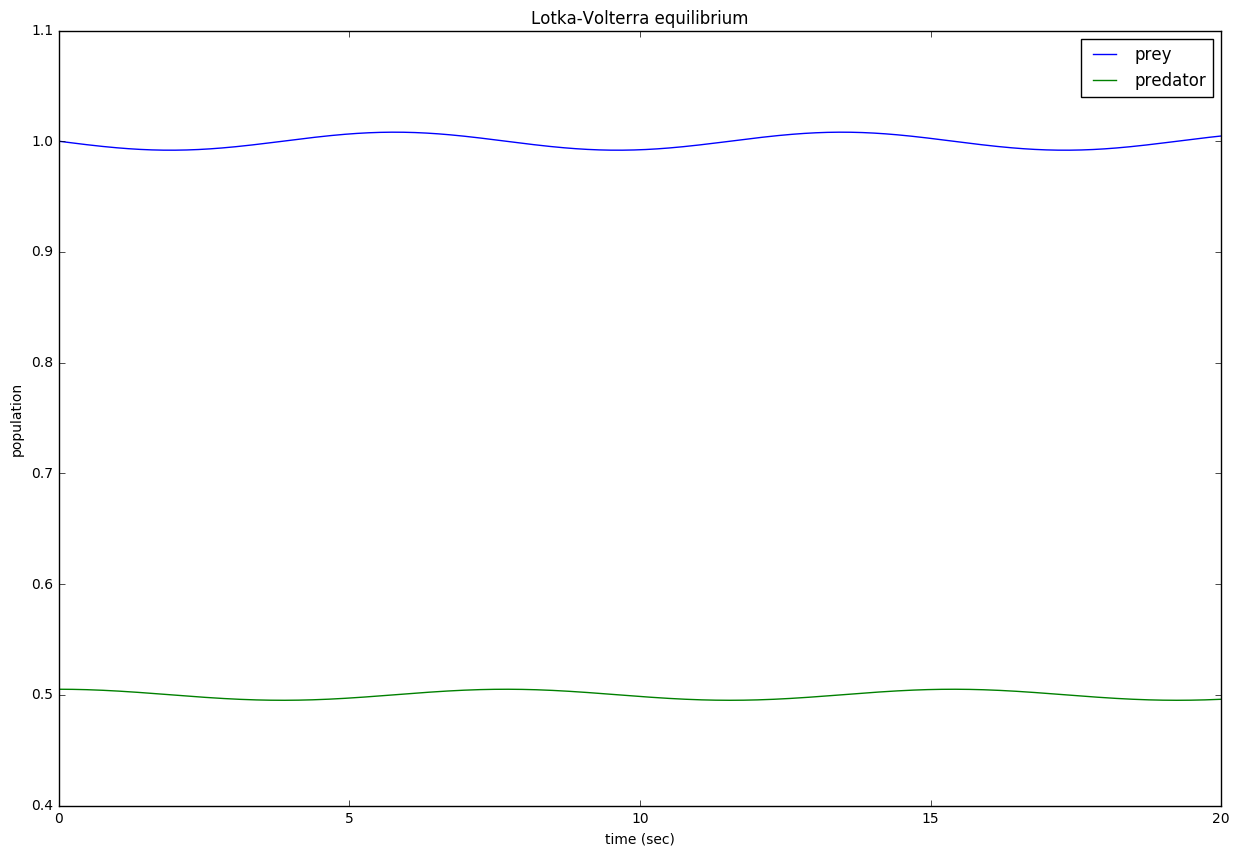

In [17]:
z = runge_kutta4_system(fs, t, y0)

plt.figure(figsize=(15, 10))
plt.plot(t, z[:, 0], t, z[:, 1])
plt.legend(['prey', 'predator'], loc='best')
plt.xlabel('time (sec)')
plt.ylabel('population')
plt.title('Lotka-Volterra equilibrium')
plt.show()

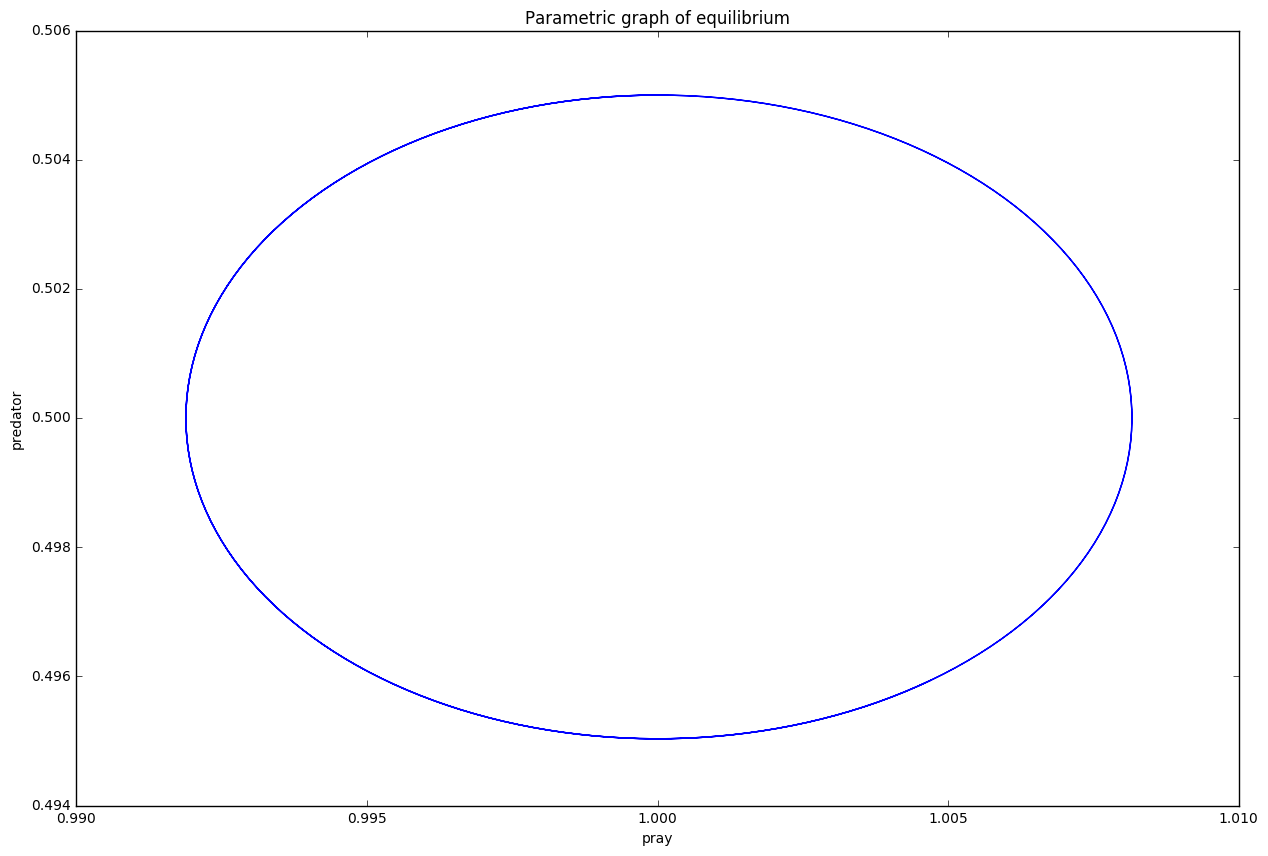

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(z[:, 0], z[:, 1])
plt.xlabel('pray')
plt.ylabel('predator')
plt.title('Parametric graph of equilibrium')
plt.show()